<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>
<br>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=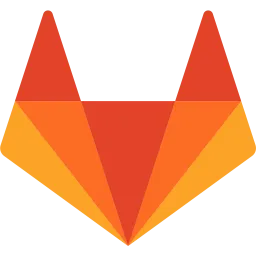" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CCase%20studies%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=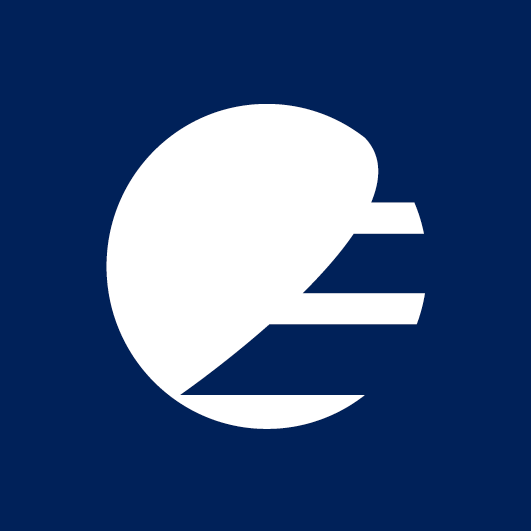" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FAcq_syn%2FAutomated_downloads%2Automated_downloads.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/Acq_syn/Automated_downloads/Automated_downloads.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download from the EUMETSAT Data Store

There are no prerequisite notebooks for this module.<br>

</div>
<hr>

# Automated downloading of EUMETSAT marine products

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 SLSTR level-2P | EO:EUM:DAT:0412 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0179" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:SL_2_WST___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASL_2_WST___&initial=1" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know how to;
* Access EUMETSAT Copernicus marine products from the EUMETSAT Data Store
* Construct a search query to match the data we want
* Automate this search query to constantly gather new data

### Outline

<center><img src='https://www.pmel.noaa.gov/gtmba/sites/default/files/styles/landing_page_banner/public/thumbnails/image/IMG_0622.jpg?itok=2kbeXv8z&c=50259841db4e6fd909aea30cc0b86551
' align='center' width='750px' height="800px"/>
<img src='http://www.pmel.noaa.gov/pirata/global_pirata_web_sm.gif' align='center' width='500px' height="300px"/><br>Figure 1: The Atlantic monitoring <a href="https://www.brest.ird.fr/pirata/" target="_blank">PIRATA</a> branch of the <a href="https://www.pmel.noaa.gov/gtmba/" target="_blank">Global Tropical Moored Buoy Array (GTMBA)</a> (Credit: PMEL)</center><br><br>

It is fairly common for us to want to work with the newest satellite data available. We do this, for example, when we want to monitor a region in near real-time, or when we want to compare against *in situ* platforms that are continually acquiring, e.g. a mooring. The first step in most of these activities is to automate data acquisition, allowing us to download the newest data available with no intervention.

In this notebook, we are going to download near real-time sea surface temperature products from the Sentinel-3 Sea and Land Surface Temperature Radiometer (SLSTR) when they correspond to one of the moorings in the <a href="https://www.brest.ird.fr/pirata/" target="_blank">PIRATA</a> array, a series of moorings that make up the Atlantic branch of the Global Tropical Moored Buoy Array (GTMBA) (Figure 1). We will introduce methods to do this using an entirely Pythoon-based approach, and using external system tools such as *cron* on Linux/OSx and *ScheduledTasks* on Windows.

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Authenticating the EUMETSAT Data Store](#section2)
 1. [Step 3: Selecting data from the EUMETSAT Data Store](#section3)
 1. [Step 4: Automating downloading within Python](#section4)
 1. [Step 5: Automating downloading outside of Python](#section5)
 1. [Step 6: Conclusions](#section6)
 1. [Step 7: Challenge (optional)](#section7)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

In [1]:
import datetime                           # a library that allows us to work with dates and times
import eumdac                             # a tool that helps us download via the eumetsat/data-store
import getpass                            # a library to help us enter passwords
import os                                 # a library that allows us access to basic operating system commands
from pathlib import Path                  # a library to help us to construct system paths
import schedule                           # a library to help us to schedule tasks
import shutil                             # a library that allows us access to basic operating system commands like copy
import subprocess                         # a library to help us to run system commands
import sys                                # a library that gives us access to system tools
import time                               # a library that helps us manage script timing
import warnings                           # a library that helps us handle warnings

# turn off any script warnings
warnings.filterwarnings('ignore')

Lets begin by setting a few parameters that we will need for our experiment, beginning with the location of one of the PIRATA moorings (in this case the most North Easterly) and the size of the box we want to acquire around this location.

In [2]:
# PIRATA mooring location
lat = 21
lon = -23

# size of the box we want to acquire around the location of interest
spatial_tolerance = 0.25

Next, lets specify the collections of interest that contain our data source.

In [3]:
collectionID = "EO:EUM:DAT:0412"

Data from Sentinel-3 is available at various timeliness. Near real-time data (NR) is available quickly, but does not have the highest quality. Non time-critical data (NT) is available more slowly, but is higher quality. We want the most up to date data, so we will focus on the NR data.

In [4]:
timeliness = "NR"

Lastly, lets set a few parameters that help us with automating our acquisition; the number of days before today we want to limit our search to (`days_ago`), the format we want any time variables to be in (`tformat`) and how often to run our search (`n_seconds`).

In [5]:
days_ago = 5
tformat = '%Y-%m-%dT%H:%M:%S'
nseconds = 10

Now we are ready to begin gathering our data for analysis, beginning by authenticating our access to the EUMETSAT Data Store.

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Authenticating the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [6]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token '07d0918b-de20-3b1d-80e4-c3305446bb1a' expires 2024-04-30 15:50:37.977822


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [7]:
datastore = eumdac.DataStore(token)

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Selecting data from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

Now we have authenticated our `datastore` object, lets connect to the collection we are interested in using the `get_collection` method.

In [8]:
# Use collection ID
collection = datastore.get_collection(collectionID)

We will now search in our collection, filtering our search by the specified `timeliness`, our region of interest and the number of days before now (`days_ago`) and today. We can do this as follows;

In [9]:
# make a very small box around our proposed mooring
ROI = [[lon - spatial_tolerance, lat - spatial_tolerance],
       [lon - spatial_tolerance, lat + spatial_tolerance],
       [lon + spatial_tolerance, lat + spatial_tolerance],
       [lon + spatial_tolerance, lat - spatial_tolerance],
       [lon - spatial_tolerance, lat - spatial_tolerance]]

# convert this to a WKT polygon
polygon = 'POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in ROI]))

# make a very small time window around our cruise point time
dtend = datetime.datetime.now()
dtstart = dtend - datetime.timedelta(days=days_ago)
products = collection.search(dtstart=dtstart, dtend=dtend, geo=polygon, timeliness=timeliness)

Lets see how many products we found...

In [10]:
for product in products:
    print(str(product))
print(f"\n----\nFound {len(products)} products")

S3B_SL_2_WST____20240430T112844_20240430T113144_20240430T132402_0179_092_251_2520_MAR_O_NR_003.SEN3
S3A_SL_2_WST____20240429T234146_20240429T234446_20240430T003119_0179_112_002_0180_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240429T230550_20240429T230850_20240430T012853_0179_092_244_0360_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240429T115455_20240429T115755_20240429T135126_0179_092_237_2520_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240428T232900_20240428T233200_20240429T001806_0179_092_230_0180_MAR_O_NR_003.SEN3
S3A_SL_2_WST____20240428T111903_20240428T112203_20240428T131506_0180_111_365_2520_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240427T235511_20240427T235811_20240428T004452_0179_092_216_0180_MAR_O_NR_003.SEN3
S3A_SL_2_WST____20240427T114514_20240427T114814_20240427T134126_0179_111_351_2520_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240427T110917_20240427T111217_20240427T130127_0179_092_208_2700_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240427T110617_20240427T110917_20240427T130125_0179_092_208_2520_MAR_O_NR_003.SEN3


<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Automating downloading **within Python**
[Back to top](#TOCTOP)

</div>

So far so good, but we have only made a single query! To automate this, we need to;
* provide a way to schedule the search and download process in time, and
* a way to update the start and end dates for the acquisition

Fortunately, this is quite easy to do in Python using the `Schedule` library (imported above). `Schedule` will run a function on any time base you specify. Lets go ahead and build our function, which we will call `automate_run`.

`automate_run` takes the search query we ran above, and adds a download component to it. It accepts a number of arguments (`token`, `collectionID`, `polygon`, `timeliness`, `days_ago`) that allow up to update it on the fly.

In [11]:
def automate_run(token, collectionID, polygon, timeliness, days_ago):
    '''
     A function to download specified products from the EUMETSAT Data Store
    '''
    # instantiate the datastore
    datastore = eumdac.DataStore(token)
    
    # select collection
    collection = datastore.get_collection(collectionID)
    
    # set parameters
    dtend = datetime.datetime.now()
    dtstart = dtend - datetime.timedelta(days=days_ago)
    
    print("----------Downloads starting----------")
    print(f"Start date: {dtstart.strftime(tformat)}\nEnd date: {dtend.strftime(tformat)}")
    
    # search for the specified products
    products = collection.search(dtstart=dtstart, dtend=dtend, geo=polygon, timeliness=timeliness)

    # download the specified products
    for product in products:
        product_zip = os.path.join(os.getcwd(), str(product) + '.zip')
        if os.path.exists(product_zip):
            print(f'Skipping {str(product)} (exists)')
        else:
            with product.open() as fsrc, open(fsrc.name, mode='wb') as fdst:
                print(f'Downloading {fsrc.name}.')
                shutil.copyfileobj(fsrc, fdst)
    
    print("----------Downloads complete----------")

The `automate_run` function is defined, but we are not yet running it. To set things up, we launch it via `schedule`. In the cell below, we set up `schedule` to run every `nseconds` (which we defined above as 10 by default), providing our function name and arguments.

Once it is set up, we start an "infinite" `while` loop that will continually run downloading new data as it appears in the Data Store (and backfilling everything we delete that falls within scope!).

In [12]:
schedule.every(nseconds).seconds.do(automate_run,
                                    token=token,
                                    collectionID=collectionID,
                                    polygon=polygon,
                                    timeliness=timeliness,
                                    days_ago=days_ago)
while 1:
    schedule.run_pending()
    time.sleep(1)

----------Downloads starting----------
Start date: 2024-04-25T15:29:01
End date: 2024-04-30T15:29:01
----------Downloads complete----------
----------Downloads starting----------
Start date: 2024-04-25T15:30:34
End date: 2024-04-30T15:30:34
Skipping S3B_SL_2_WST____20240430T112844_20240430T113144_20240430T132402_0179_092_251_2520_MAR_O_NR_003.SEN3 (exists)
Skipping S3A_SL_2_WST____20240429T234146_20240429T234446_20240430T003119_0179_112_002_0180_MAR_O_NR_003.SEN3 (exists)
Skipping S3B_SL_2_WST____20240429T230550_20240429T230850_20240430T012853_0179_092_244_0360_MAR_O_NR_003.SEN3 (exists)
Skipping S3B_SL_2_WST____20240429T115455_20240429T115755_20240429T135126_0179_092_237_2520_MAR_O_NR_003.SEN3 (exists)
Skipping S3B_SL_2_WST____20240428T232900_20240428T233200_20240429T001806_0179_092_230_0180_MAR_O_NR_003.SEN3 (exists)
Skipping S3A_SL_2_WST____20240428T111903_20240428T112203_20240428T131506_0180_111_365_2520_MAR_O_NR_003.SEN3 (exists)
Skipping S3B_SL_2_WST____20240427T235511_20240427T2

KeyboardInterrupt: 

You automated job is now running! However, you must keep Python open to keep it so. If you wish to clear the jobs, you can do so using the commands below.

In [13]:
# Clear the job, when completed
schedule.clear()
schedule.cancel_job(automate_run)

This approach is simple, compartmentalised and does not require any additional authentication. However it has some major drawbacks in that;

1. it only runs in the context of this notebook, which is not as stable as a system environment
2. it requires all of the Python dependencies that we provide with this environment
3. there is no logging if something goes wrong!

A better strategy would be to take advantage of the `eumdac` command line interface (CLI) to schedule the task using common system tools. This is what we will explore next.

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5.  Automating downloading **outside of Python**
[Back to top](#TOCTOP)

</div>

All of the data access and download commands we have constructed using the `eumdac` Python library, can be replicated using the `eumdac` command line interface (CLI). You can find more information on using the CLI on our <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide" target="_blank">EUMDAC user guide</a> on our <a href="https://user.eumetsat.int/" target="_blank">User Portal</a>. Lets go ahead an create an example of a CLI search command using the variables in this script.

*Note that we are providing the full path for the eumdac CLI exectuable.*

In [14]:
python_path = os.path.dirname(sys.executable)
CLI_command_search = f"{python_path}/eumdac search -c {collectionID} -s {dtstart.strftime(tformat)} -e {dtend.strftime(tformat)} --geometry '{polygon}' --timeliness {timeliness}"
print(f"Our CLI search command is\n------\n{CLI_command_search}")

Our CLI search command is
------
/opt/anaconda3/envs/cmts_ocean_case_studies/bin/eumdac search -c EO:EUM:DAT:0412 -s 2024-04-25T15:26:16 -e 2024-04-30T15:26:16 --geometry 'POLYGON((-23.25 20.75,-23.25 21.25,-22.75 21.25,-22.75 20.75,-23.25 20.75))' --timeliness NR


We can check this works by running this "system command" in Python using the `subprocess` library. We should get exactly the same answer as above.

In [15]:
process = subprocess.Popen(CLI_command_search, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(process.communicate()[0].decode('utf-8'))

S3B_SL_2_WST____20240430T112844_20240430T113144_20240430T132402_0179_092_251_2520_MAR_O_NR_003.SEN3
S3A_SL_2_WST____20240429T234146_20240429T234446_20240430T003119_0179_112_002_0180_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240429T230550_20240429T230850_20240430T012853_0179_092_244_0360_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240429T115455_20240429T115755_20240429T135126_0179_092_237_2520_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240428T232900_20240428T233200_20240429T001806_0179_092_230_0180_MAR_O_NR_003.SEN3
S3A_SL_2_WST____20240428T111903_20240428T112203_20240428T131506_0180_111_365_2520_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240427T235511_20240427T235811_20240428T004452_0179_092_216_0180_MAR_O_NR_003.SEN3
S3A_SL_2_WST____20240427T114514_20240427T114814_20240427T134126_0179_111_351_2520_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240427T110917_20240427T111217_20240427T130127_0179_092_208_2700_MAR_O_NR_003.SEN3
S3B_SL_2_WST____20240427T110617_20240427T110917_20240427T130125_0179_092_208_2520_MAR_O_NR_003.SEN3


We can adapt this CLI search command to exploit the eumdac CLI download capability as follows;

In [17]:
CLI_command_download = f"{python_path}/eumdac download -y -c {collectionID} -s {dtstart.strftime(tformat)} -e {dtend.strftime(tformat)} --geometry '{polygon}' --timeliness {timeliness} -o {os.getcwd()}"
print(f"Our CLI download command is\n------\n{CLI_command_download}")

Our CLI download command is
------
/opt/anaconda3/envs/cmts_ocean_case_studies/bin/eumdac download -y -c EO:EUM:DAT:0412 -s 2024-04-25T15:26:16 -e 2024-04-30T15:26:16 --geometry 'POLYGON((-23.25 20.75,-23.25 21.25,-22.75 21.25,-22.75 20.75,-23.25 20.75))' --timeliness NR -o /Users/benloveday/Code/Git_Reps/CMTS/internal/applications/ocean-case-studies/Case_studies/Acq_syn/Automated_downloads


*Note that we have added the "-y" switch to force downloading without interaction, and the -o <OUTPUT_DIR> switch to specify our download directory*

All we need to do now if place the command in the correct place and find a way to adapt the dates as required. How we approach this depends on our operating system...

<div class="alert alert-success" role="alert">

## On Linux and MacOSx: Using Cron

</div>

Linux and Mac OSx contain an autoscheduler called "cron". You can access this and see what you are automating (which may be nothing!) by typing the following in a terminal;

`crontab -l`

to edit it, you can use

`crontab -e`

To use cron you need to add a line to the crontab and set the timing for scheduling the run. The timer is represented by five stars, which set minute, hour, day of the month, month and day of the week. You can find more information on timing in this <a href="https://crontab.guru/" target="_blank">web article</a>. To set our job to run at, for example, 09:00 every day (machine time) we would set the line in our crontab as follows;

In [18]:
print(f"0 9 * * * {CLI_command_download}")

0 9 * * * /opt/anaconda3/envs/cmts_ocean_case_studies/bin/eumdac download -y -c EO:EUM:DAT:0412 -s 2024-04-25T15:26:16 -e 2024-04-30T15:26:16 --geometry 'POLYGON((-23.25 20.75,-23.25 21.25,-22.75 21.25,-22.75 20.75,-23.25 20.75))' --timeliness NR -o /Users/benloveday/Code/Git_Reps/CMTS/internal/applications/ocean-case-studies/Case_studies/Acq_syn/Automated_downloads


If you run `crontab -e` and copy and paste the line above into it before saving then this job is set to run on your system.

**But there are two problems!**
1. the dates are static and we need them to update
2. there is no logging

We can deal with the first point, by using the system commands from Linux and Mac OSx to update the data as we go. The date command we use depends on our operating system. We can deal with the second issue by adding a ">> <LOGFILE> 2>&1" option at the end of our command. This will dump both standard output and errors to our log file.

### For LINUX dates (GNU date)

In [19]:
date_cmd_start = f"$(date +\%Y-\%m-\%d -d '{days_ago} day ago')"
date_cmd_end = "$(date +\%Y-\%m-\%d)"
CLI_command_download = f"{python_path}/eumdac download -y -c {collectionID} -s {date_cmd_start} -e {date_cmd_end} --geometry '{polygon}' --timeliness={timeliness} -o {os.getcwd()} >> {os.path.join(os.getcwd(), 'cronlog.log')} 2>&1"
print(f"Our 'cron-ready' Linux CLI download command is\n------\n0 9 * * * {CLI_command_download}")

Our 'cron-ready' Linux CLI download command is
------
0 9 * * * /opt/anaconda3/envs/cmts_ocean_case_studies/bin/eumdac download -y -c EO:EUM:DAT:0412 -s $(date +\%Y-\%m-\%d -d '5 day ago') -e $(date +\%Y-\%m-\%d) --geometry 'POLYGON((-23.25 20.75,-23.25 21.25,-22.75 21.25,-22.75 20.75,-23.25 20.75))' --timeliness=NR -o /Users/benloveday/Code/Git_Reps/CMTS/internal/applications/ocean-case-studies/Case_studies/Acq_syn/Automated_downloads >> /Users/benloveday/Code/Git_Reps/CMTS/internal/applications/ocean-case-studies/Case_studies/Acq_syn/Automated_downloads/cronlog.log 2>&1


### For OSX dates (BSD date)

In [20]:
date_cmd_start = f"$(date -v-{days_ago}d +\%Y-\%m-\%d)"
date_cmd_end = "$(date +\%Y-\%m-\%d)"
CLI_command_download = f"{python_path}/eumdac download -y -c {collectionID} -s {date_cmd_start} -e {date_cmd_end} --geometry '{polygon}' --timeliness={timeliness}  -o {os.getcwd()} >> {os.path.join(os.getcwd(), 'cronlog.log')}"
print(f"Our 'cron-ready' OSx CLI download command is\n------\n0 9 * * * {CLI_command_download}")

Our 'cron-ready' OSx CLI download command is
------
0 9 * * * /opt/anaconda3/envs/cmts_ocean_case_studies/bin/eumdac download -y -c EO:EUM:DAT:0412 -s $(date -v-5d +\%Y-\%m-\%d) -e $(date +\%Y-\%m-\%d) --geometry 'POLYGON((-23.25 20.75,-23.25 21.25,-22.75 21.25,-22.75 20.75,-23.25 20.75))' --timeliness=NR  -o /Users/benloveday/Code/Git_Reps/CMTS/internal/applications/ocean-case-studies/Case_studies/Acq_syn/Automated_downloads >> /Users/benloveday/Code/Git_Reps/CMTS/internal/applications/ocean-case-studies/Case_studies/Acq_syn/Automated_downloads/cronlog.log


*Note: we have to add the back-slashes to escape how Linux and OSx interprets the percent signs*

**We are almost done!** To use the above, you only need to make some small changes, as follows;
1. make sure you have run this on your own system to get the correct path to eumdac
1. replace the download directory with your directory of choice
1. replace the logfile with your logfile of choice
1. update the timing from 0 9 * * *, as required
1. copy the updated code line into your crontab
  
Once you have done this, you should be all set!

<div class="alert alert-success" role="alert">

## On Windows

</div>

**Warning: This approach is HIGHLY dependant on your system admin rights and if you are allowed to run scripts on your system**

Windows schedules processes using a different method, called ScheduledTasks. We can set up the required task using a Powershell script (as Windows CMD mangles dates beyond belief). Before we go any further we need to set up our Powershell command as follows;

### Windows Powershell dates

In [ ]:
date_cmd_start = f"(Get-Date).AddDays(-{days_ago}).ToString('yyyy-MM-dd')"
date_cmd_end = "(Get-Date).ToString('yyyy-MM-dd')"
CLI_command_download = f'{python_path}/eumdac download -y -c {collectionID} -s {date_cmd_start}\n-e {date_cmd_end} --geometry "{polygon}" --timeliness {timeliness} -o {os.getcwd()}'
print(CLI_command_download)

The above will require some adaptation of the paths to your **eumdac** executable and **output directory** on your system. Once we have this set up we need to write it to a powershell file called `eumdac_automate.ps1` on your system desktop. You can use notepad to create the file, but make sure you save it with the ps1 extension. Now you should follow these steps;

1. Open the scheduler by searching for "Task Scheduler" in your start menu.
2. Once it is open, select "Action > Create Basic task", which will open the task creation wizard (left panel, below).
3. Under the "Name" section, write EUMDAC_AUTOMATION (middle panel, below).
4. Under the "Trigger" section, select Daily.
5. Under the "Daily" section, select the time you want the script to run every day.
6. Under the "Action" section, select "Start a program".
7. Under the "Start a Program" section, write "powershell" in the Program/script section (right panel, below).
8. Under the "Start a Program" section, you should add the following in the "Add arguments section": -File <YOUR_POWERSHELL_SCRIPT>, replacing the <YOUR_POWERSHELL_SCRIPT> tag with the full path the file we created and placed on your desktop.
9. Click Next and Finish and you are done! Your automated downloader is in place.

<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/TS_Panel1.png?ref_type=heads' align='left' width='33%'/>
<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/TS_Panel2.png?ref_type=heads' align='left' width='33%'/>
<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/TS_Panel3.png?ref_type=heads' align='left' width='33%'/>

If you want a bit more information you can see <a href="ttps://blog.netwrix.com/2018/07/03/how-to-automate-powershell-scripts-with-task-scheduler/" target="_blank">these instructions</a> on how to set up the automated tasks. Again, to reiterate, this approach will ONLY work if your system administrator allows you to run scripts through Powershell. If they do not, you should use the Pythonic approach used in [Section 4](#section4).

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Conclusions
[Back to top](#TOCTOP)

</div>

Automating data acquisition is very often the first step in building an operational data processing chain. Using the tools and examples above you should be able to exploit either the `eumdac` Python library or CLI and either a Python, cron or ScheduledTasks based approach to begin building your own system. In all cases, when you are considering automation, it is important to act as a "good citizen". For example, try not to overload systems by sending very frequent download enquiries (e.g. every few seconds!). 

<div class="alert alert-warning" role="alert">

## <a id='section7'></a>7. Challenge (optional)
[Back to top](#TOCTOP)

</div>

Once you have run the "Within Python" options in [Step 4](#section4), try to implement the appropriate workflows from [Step 5](#section5) for your system. If you need any help, please feel free to contact us!

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>